Austin Marckx
2022-09-13
Exploratory Data Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
#from gmr import GMM

In [4]:
df = pd.read_excel('./data/AD.training.xlsx')

In [5]:
# Dataset looks like it was read in fine.
df

,RID,PTID,EXAMDATE,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,MMSE.Change
0,222.0,005_S_0222,2006-03-17,LMCI,85.9,Male,18.0,0.0,25.0,1.0
1,1380.0,072_S_1380,2007-04-04,LMCI,84.7,Male,12.0,0.0,29.0,0.0
2,1321.0,012_S_1321,2007-03-12,LMCI,83.2,Male,20.0,0.0,28.0,1.0
3,4521.0,002_S_4521,2012-02-23,LMCI,70.0,Male,18.0,1.0,27.0,-2.0
4,4216.0,073_S_4216,2011-09-19,EMCI,56.4,Male,14.0,0.0,29.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
379,685.0,002_S_0685,2006-07-20,CN,89.6,Female,16.0,0.0,30.0,0.0
380,2381.0,009_S_2381,2011-05-31,EMCI,69.1,Male,16.0,2.0,28.0,0.0
381,4213.0,002_S_4213,2011-09-13,CN,78.0,Female,14.0,0.0,28.0,1.0
382,3.0,011_S_0003,2005-09-12,AD,81.3,Male,18.0,1.0,20.0,-1.0


In [19]:
pdf = df.drop(['RID', 'PTID', 'EXAMDATE'], axis=1)
labelEnc = LabelEncoder()
pdf['APOE4'] = labelEnc.fit_transform(pdf['APOE4'])
pdf['DX.bl'] = labelEnc.fit_transform(pdf['DX.bl'])
pdf['PTGENDER'] = labelEnc.fit_transform(pdf['PTGENDER'])

pdf

,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,MMSE.Change
0,3,85.9,1,18.0,0,25.0,1.0
1,3,84.7,1,12.0,0,29.0,0.0
2,3,83.2,1,20.0,0,28.0,1.0
3,3,70.0,1,18.0,1,27.0,-2.0
4,2,56.4,1,14.0,0,29.0,-2.0
...,...,...,...,...,...,...,...
379,1,89.6,0,16.0,0,30.0,0.0
380,2,69.1,1,16.0,2,28.0,0.0
381,1,78.0,0,14.0,0,28.0,1.0
382,0,81.3,1,18.0,1,20.0,-1.0


In [ ]:
# Should probably OHE the labels for the Gaussian mix

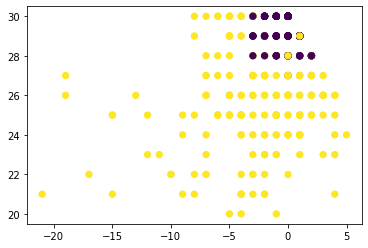

In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture
bgmm_sklearn = BayesianGaussianMixture(n_components=2, covariance_type='diag')
bgmm_sklearn.fit(pdf)
bgmm_labels = bgmm_sklearn.predict(pdf)

plt.scatter(pdf.loc[:, 'MMSE.Change'], pdf.loc[:, 'MMSE'], c=bgmm_labels, s=40, cmap='viridis')

In [61]:
X = pdf.drop('MMSE.Change', axis=1)
Y = pdf.loc[:,'MMSE.Change']

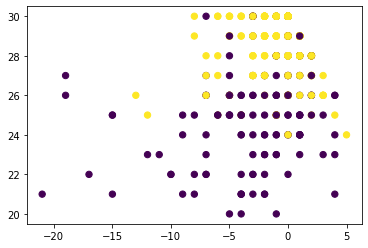

In [87]:
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture
bgmm_sklearn = BayesianGaussianMixture(n_components=2, covariance_type='full')
bgmm_sklearn.fit(pdf.drop('MMSE.Change', axis=1))
#bgmm_labels = bgmm_sklearn.predict(pdf)

pdf['lab'] = bgmm_sklearn.predict(pdf.drop('MMSE.Change', axis=1))
X['lab'] = pdf['lab']

plt.scatter(pdf.loc[:, 'MMSE.Change'], pdf.loc[:, 'MMSE'], c=pdf.loc[:,'lab'], s=40, cmap='viridis')

In [88]:
pdf

,DX.bl,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,MMSE.Change,lab
0,3,85.9,1,18.0,0,25.0,1.0,0
1,3,84.7,1,12.0,0,29.0,0.0,0
2,3,83.2,1,20.0,0,28.0,1.0,0
3,3,70.0,1,18.0,1,27.0,-2.0,1
4,2,56.4,1,14.0,0,29.0,-2.0,1
...,...,...,...,...,...,...,...,...
379,1,89.6,0,16.0,0,30.0,0.0,1
380,2,69.1,1,16.0,2,28.0,0.0,1
381,1,78.0,0,14.0,0,28.0,1.0,1
382,0,81.3,1,18.0,1,20.0,-1.0,0


In [91]:
rf = RandomForestRegressor()
rf.fit(X, Y)



array([ 1.52000000e+00, -4.00000000e-02, -1.60000000e-01, -2.54000000e+00,
       -1.69000000e+00, -4.53000000e+00, -4.20000000e-01,  8.10000000e-01,
        1.08000000e+00, -1.19000000e+00,  3.00000000e-01, -8.60000000e-01,
       -1.60000000e-01,  4.70000000e-01, -9.00000000e-02, -5.68000000e+00,
        1.11000000e+00, -3.29000000e+00, -2.80000000e+00,  2.04000000e+00,
       -5.70000000e-01, -3.30000000e-01,  1.81000000e+00, -4.48333333e-01,
       -1.13000000e+00, -3.30000000e-01, -1.00000000e-02, -9.60000000e-01,
       -2.37000000e+00, -5.33000000e+00,  7.30000000e-01,  4.00000000e-02,
       -4.59000000e+00, -9.06000000e+00, -4.60000000e-01, -1.42000000e+00,
        2.46000000e+00, -3.04000000e+00, -7.00000000e-01, -5.66000000e+00,
        1.50000000e+00, -3.20000000e+00,  8.30000000e-01, -1.74000000e+00,
       -3.20000000e-01, -4.56000000e+00, -7.19000000e+00, -3.17000000e+00,
       -4.80000000e-01, -5.40000000e-01, -1.10000000e-01,  4.20000000e-01,
        8.80000000e-01, -

In [93]:
train_pred = rf.predict(X)
rf.feature_importances_

array([0.19239814, 0.3779528 , 0.04048081, 0.14108149, 0.06393632,
       0.17050512, 0.01364532])

In [94]:
rf

RandomForestRegressor()

In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py

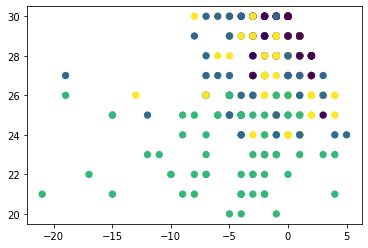

In [45]:
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
gmm_sklearn = GaussianMixture(n_components=4, covariance_type='diag')
gmm_sklearn.fit(pdf)
labels = gmm_sklearn.predict(pdf)

plt.scatter(pdf.loc[:, 'MMSE.Change'], pdf.loc[:, 'MMSE'], c=labels, s=40, cmap='viridis')

In [27]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

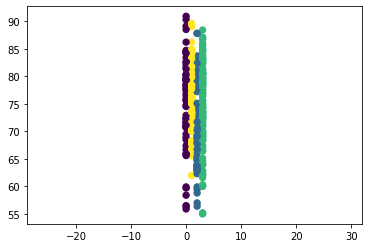

In [34]:
plot_gmm(GaussianMixture(n_components=4, covariance_type='diag'), pdf.to_numpy())

In [9]:
print(f'Col Types: {df.dtypes}\nFirst Row:{df.values[0]}')

Col Types: RID                   float64
PTID                   object
EXAMDATE       datetime64[ns]
DX.bl                  object
AGE                   float64
PTGENDER               object
PTEDUCAT              float64
APOE4                 float64
MMSE                  float64
MMSE.Change           float64
dtype: object
First Row:[222.0 '005_S_0222' Timestamp('2006-03-17 00:00:00') 'LMCI' 85.9 'Male'
 18.0 0.0 25.0 1.0]


Need to fix column types

In [15]:
df['RID'], _ = pd.factorize(df['RID'])
df['PTID'], _ = df['PTID'].factorize()
df['DX.bl'], _ = df['DX.bl'].factorize()
df['PTGENDER'], _ = df['PTGENDER'].factorize()
df['APOE4'], _ = df['APOE4'].factorize()
print(f'Col Types: {df.dtypes}\nFirst Row:{df.values[0]}')

Col Types: RID                     int64
PTID                    int64
EXAMDATE       datetime64[ns]
DX.bl                   int64
AGE                   float64
PTGENDER                int64
PTEDUCAT              float64
APOE4                   int64
MMSE                  float64
MMSE.Change           float64
dtype: object
First Row:[0 0 Timestamp('2006-03-17 00:00:00') 0 85.9 0 18.0 0 25.0 1.0]


In [ ]:
df['RID'] = pd.factorize(pd.Categorical(df['RID']))